In [1]:
# <!-- update gradient descent for logistic regression.
# explore gradient descent on a familiar data set -->
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [2]:
# Taking data set for gradient descent
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

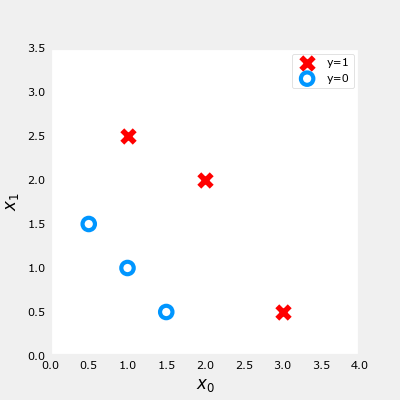

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [4]:
# Calculation for gradeint descent
def caluclatingGradientDescent(X,Y,wtmp,btmp):
    m,n= X.shape
    dj_dw = np.zeros(n)  #is same as      dj_dw = np.array([0, 0])
    dj_db = 1
    for i in range(m):
        g_z = sigmoid(np.dot(X[i],wtmp)+btmp)
        g_zsuby = g_z - Y[i]

        # This is multiplication for features since 2 feature i.e value of n
        for j in range(n):
            dj_dw[j] +=  g_zsuby*X[i,j]
        print(dj_dw)

        dj_db += g_zsuby
    
    # Final calculation for dj_dw & dj_db is by dividing with n.o of m
    dj_db = dj_db/m
    dj_dw = dj_dw/m

    return dj_db,dj_dw




In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = caluclatingGradientDescent(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )
# We got 2 values for dj_dw bcoz of x features is 2 so the value are dj_dw[0] & dj_dw[1]

[0.5 1.5]
[1.5 2.5]
[2.99 2.99]
[2.99 2.99]
[2.99 2.99]
[2.99 2.99]
dj_db: 0.6652847321299524
dj_dw: [0.498333393278696, 0.49883942983996693]


In [6]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m)): target values
      w (ndarray (n)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (ascalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n))
    dj_dw = np.array([0, 0])
    print(dj_dw)                           # dj_dw is a array for calculation of X[i,j] * 
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          # This is calculation for g(z) which is sigmond function
        err_i  = f_wb_i  - y[i]                       #This is calculation for error now we are remaining with xi but remember x is 2 dmin array i.e 2 features 
        for j in range(n):                                 #------------------THIS calculation for x[0] & x[1] feature
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]  
            print("The i and y are:-",i,j,X[i,j],err_i,dj_dw)
            print("The value of j and n",j,n)#scalar
        print(dj_dw)
      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [7]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

[0 0]
The i and y are:- 0 0 0.5 0.998498817743263 [0 0]
The value of j and n 0 2
The i and y are:- 0 1 1.5 0.998498817743263 [0 1]
The value of j and n 1 2
[0 1]
The i and y are:- 1 0 1.0 0.9975273768433653 [0 1]
The value of j and n 0 2
The i and y are:- 1 1 1.0 0.9975273768433653 [0 1]
The value of j and n 1 2
[0 1]
The i and y are:- 2 0 1.5 0.995929862284104 [1 1]
The value of j and n 0 2
The i and y are:- 2 1 0.5 0.995929862284104 [1 1]
The value of j and n 1 2
[1 1]
The i and y are:- 3 0 3.0 -0.00020342697805519894 [0 1]
The value of j and n 0 2
The i and y are:- 3 1 0.5 -0.00020342697805519894 [0 0]
The value of j and n 1 2
[0 0]
The i and y are:- 4 0 2.0 -1.6701421847953313e-05 [0 0]
The value of j and n 0 2
The i and y are:- 4 1 2.0 -1.6701421847953313e-05 [0 0]
The value of j and n 1 2
[0 0]
The i and y are:- 5 0 1.0 -2.7535691114688454e-05 [0 0]
The value of j and n 0 2
The i and y are:- 5 1 2.5 -2.7535691114688454e-05 [0 0]
The value of j and n 1 2
[0 0]
dj_db: 0.49861806546

In [8]:
from matplotlib import cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plt_prob(ax, w_out,b_out):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

    # print(len(x0_space),x1_space)

    # get probability for x0,x1 ranges
    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            z[i,j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i,j],tmp_x1[i,j]])) + b_out)
            print(z[i,j],i,j)


    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)


6.657106982903728e-07 0 0
8.24014695623413e-07 0 1
1.01996286793446e-06 0 2
1.2625068569962463e-06 0 3
1.5627269601087172e-06 0 4
1.934338307923883e-06 0 5
2.394317404364588e-06 0 6
2.963677647441993e-06 0 7
3.668429253671449e-06 0 8
4.540767429789884e-06 0 9
5.620543057686845e-06 0 10
6.957083057074008e-06 0 11
8.611443553267674e-06 0 12
1.0659198731608636e-05 0 13
1.3193892704594283e-05 0 14
1.6331311964347655e-05 0 15
2.0214773415525447e-05 0 16
2.5021669279744974e-05 0 17
3.0971567428646325e-05 0 18
3.83362365266965e-05 0 19
4.745205293906679e-05 0 20
5.8735354618859315e-05 0 21
7.270144097585865e-05 0 22
8.998808300242085e-05 0 23
0.00011138461200348901 0 24
0.0001378679071055082 0 25
0.00017064691225002557 0 26
0.0002112176959446629 0 27
0.00026143153781804835 0 28
0.0003235791045150698 0 29
0.00040049448704716474 0 30
0.0004956837401265794 0 31
0.00061348362380433 0 32
0.0007592575364289559 0 33
0.0009396371878201388 0 34
0.0011628204385844703 0 35
0.0014389379729808807 0 36
0.0

TypeError: bad operand type for unary -: 'list'

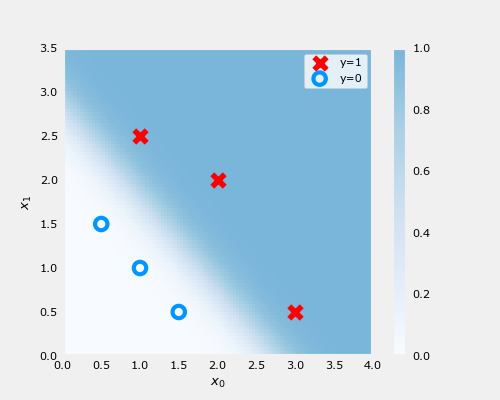

In [9]:

X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w_out = [5.28, 5.08]
b_out = [-14.222409982019837]



fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0])
plt.show()

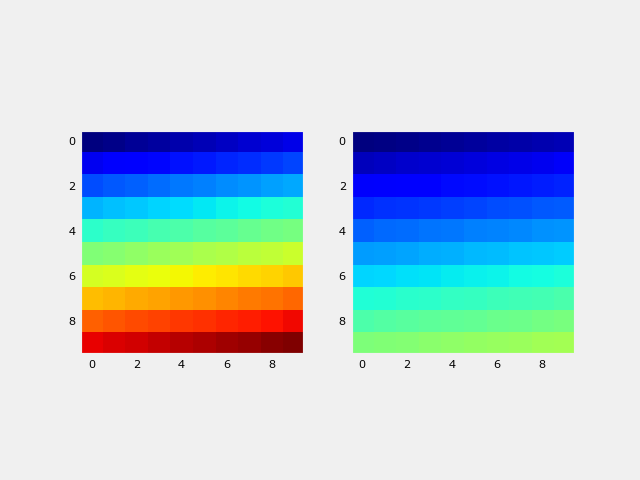

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('jet')
new_cmap = truncate_colormap(cmap, 0.0, 0.55)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()